# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [53]:
# imports
import panel as pn
import numpy as np
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
print(np.__version__)
print(pd.__version__)

1.16.5
0.24.2


In [54]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")
print(type(map_box_api))

<class 'str'>


## Load Data

In [55]:
# Read the census data into a Pandas DataFrame
file_path = (r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Homework\Week 6\Instructions\Starter_Code\Data\toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [56]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwellings_df = to_data.drop(columns=(['neighbourhood', 'average_house_value', 'shelter_costs_owned', 'shelter_costs_rented']))

dwellings_grp_df = dwellings_df.groupby(['year']).sum()

dwellings_grp_df.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


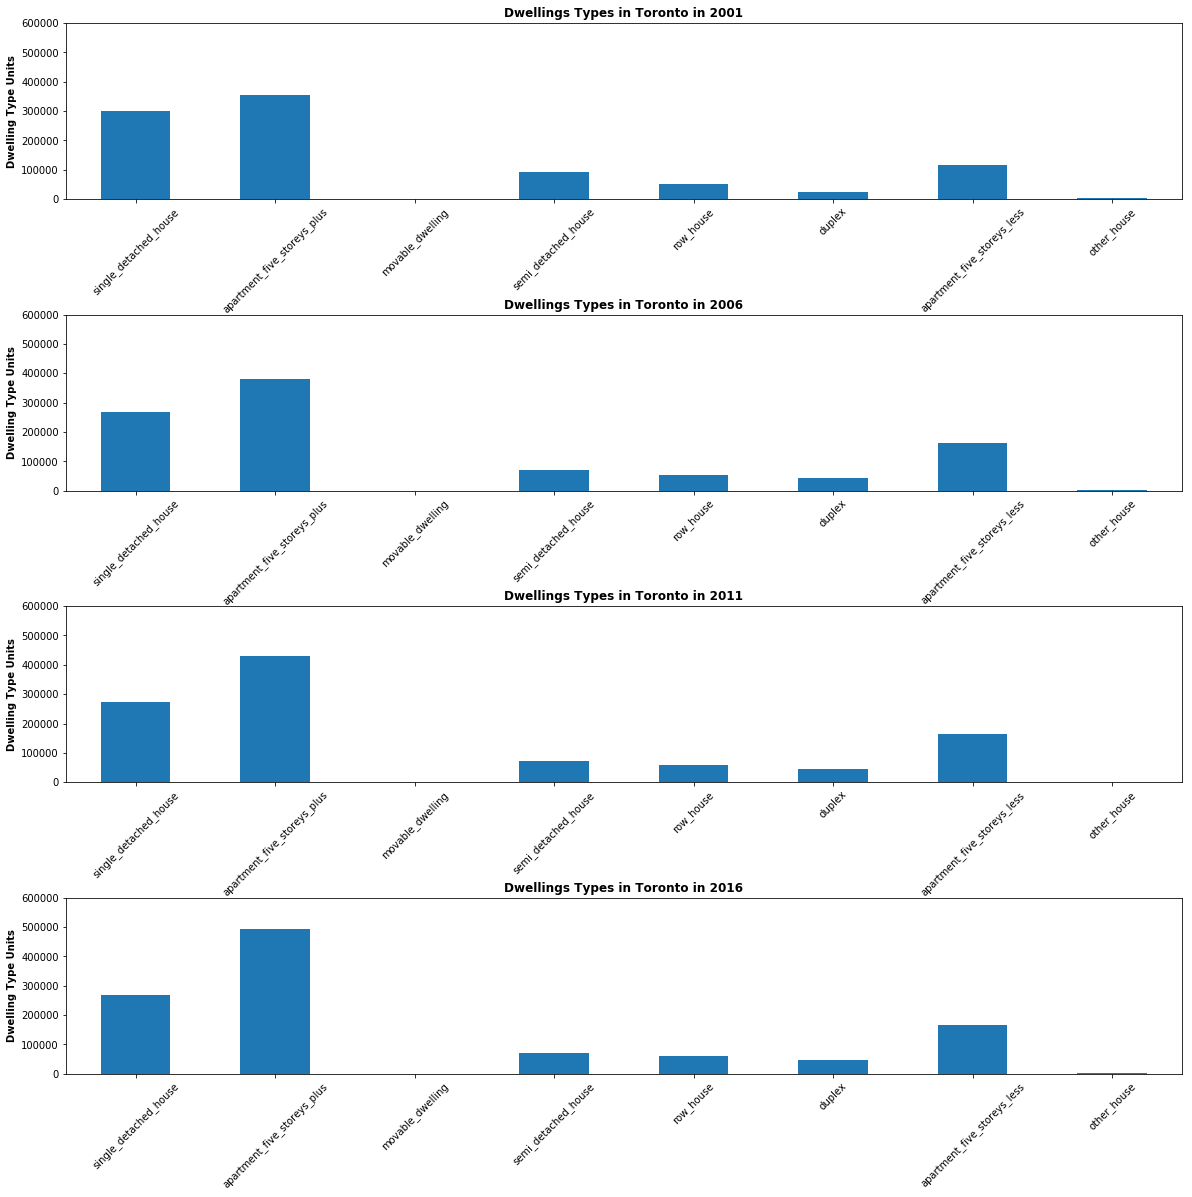

In [57]:
# Visualize the results as a bar chart using the Pandas plot function
from matplotlib.gridspec import GridSpec
fig1 = plt.figure(figsize=(30, 20))    
gs = GridSpec(30, 3, figure=fig1)
ax1 = plt.subplot(gs[0:5, 0:3])
ax2 = plt.subplot(gs[8:13, 0:3])
ax3 = plt.subplot(gs[16:21, 0:3])
ax4 = plt.subplot(gs[24:29, 0:3])

# Plot
plot1 = dwellings_grp_df.iloc[0, :].plot.bar(figsize=(20, 20), rot=45, ax=ax1)
plot1.set_title("Dwellings Types in Toronto in 2001", fontweight='bold')
plot1.set_ylabel("Dwelling Type Units", fontweight='bold')
plot1.set_ylim([0, 600000])

plot2 = dwellings_grp_df.iloc[1, :].plot.bar(figsize=(20, 20), title='Dwellings Types in Toronto in 2001', rot=45, ax=ax2)
plot2.set_title("Dwellings Types in Toronto in 2006", fontweight='bold')
plot2.set_ylabel("Dwelling Type Units", fontweight='bold')
plot2.set_ylim([0, 600000])

plot3 = dwellings_grp_df.iloc[2, :].plot.bar(figsize=(20, 20), title='Dwellings Types in Toronto in 2011', rot=45, ax=ax3)
plot3.set_title("Dwellings Types in Toronto in 2011", fontweight='bold')
plot3.set_ylabel("Dwelling Type Units", fontweight='bold')
plot3.set_ylim([0, 600000])

plot4 = dwellings_grp_df.iloc[3, :].plot.bar(figsize=(20, 20), title='Dwellings Types in Toronto in 2016', rot=45, ax=ax4)
plot4.set_title("Dwellings Types in Toronto in 2016", fontweight='bold')
plot4.set_ylabel("Dwelling Type Units", fontweight='bold')
plot4.set_ylim([0, 600000])

fig1.savefig('DefaultBarCharts.png')

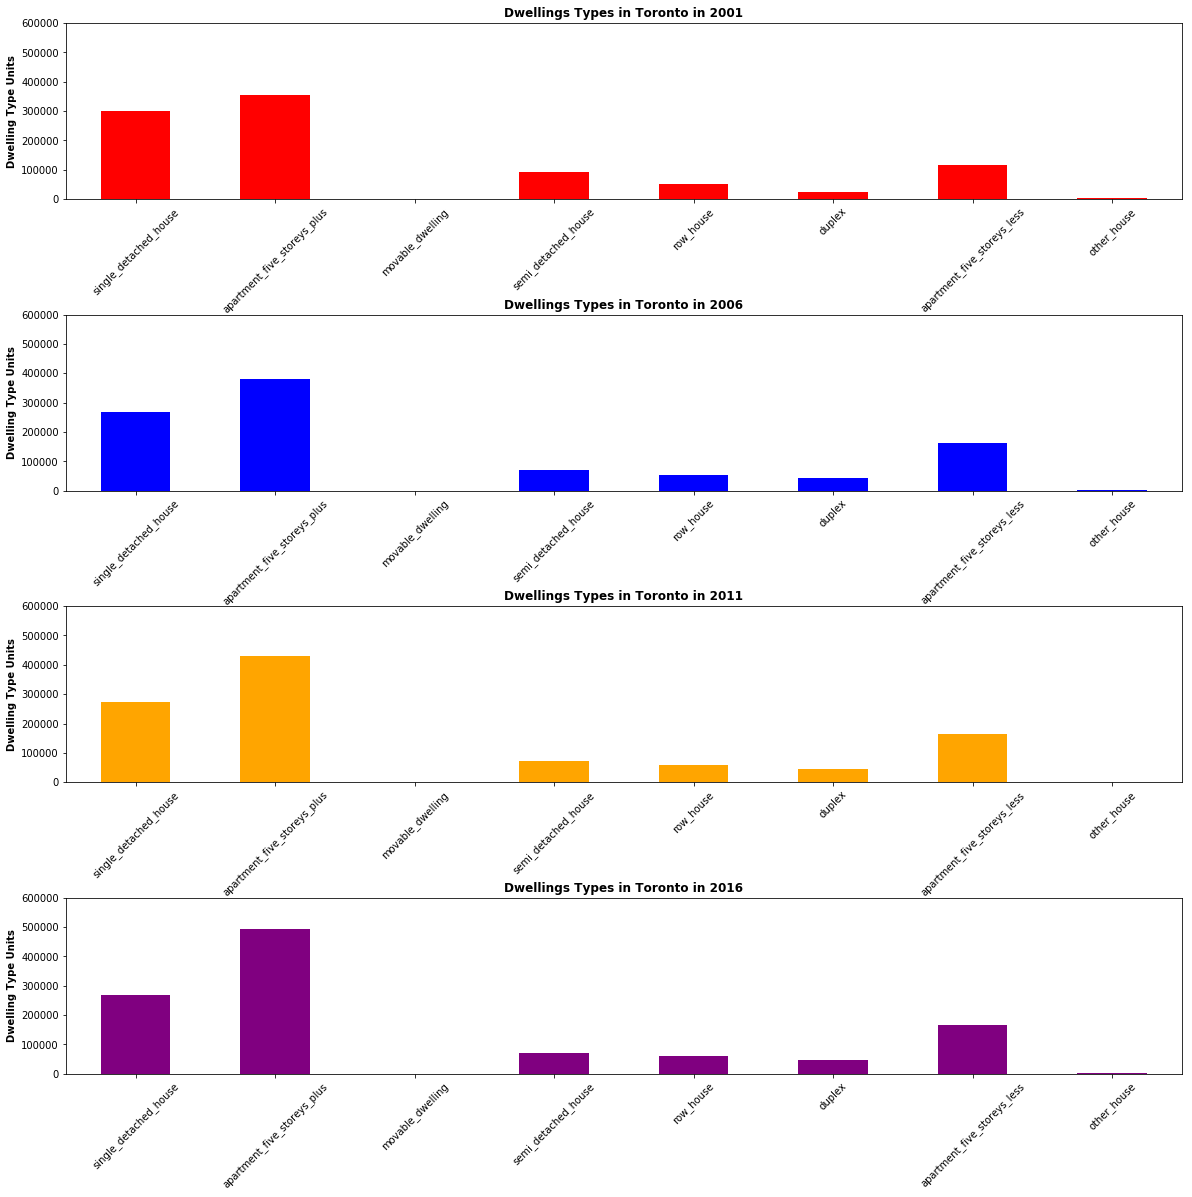

In [58]:
#Optional challenge:** Plot each bar chart in a different color.
from matplotlib.gridspec import GridSpec
fig2 = plt.figure(figsize=(30, 20))    
gs = GridSpec(30, 3, figure=fig2)
ax1 = plt.subplot(gs[0:5, 0:3])
ax2 = plt.subplot(gs[8:13, 0:3])
ax3 = plt.subplot(gs[16:21, 0:3])
ax4 = plt.subplot(gs[24:29, 0:3])

# Plot 
plot1 = dwellings_grp_df.iloc[0, :].plot.bar(figsize=(20, 20), rot=45, ax=ax1, color=['red'])
plot1.set_title("Dwellings Types in Toronto in 2001", fontweight='bold')
plot1.set_ylabel("Dwelling Type Units", fontweight='bold')
plot1.set_ylim([0, 600000])

plot2 = dwellings_grp_df.iloc[1, :].plot.bar(figsize=(20, 20), title='Dwellings Types in Toronto in 2001', rot=45, ax=ax2, color=['blue'])
plot2.set_title("Dwellings Types in Toronto in 2006", fontweight='bold')
plot2.set_ylabel("Dwelling Type Units", fontweight='bold')
plot2.set_ylim([0, 600000])

plot3 = dwellings_grp_df.iloc[2, :].plot.bar(figsize=(20, 20), title='Dwellings Types in Toronto in 2011', rot=45, ax=ax3, color=['orange'])
plot3.set_title("Dwellings Types in Toronto in 2011", fontweight='bold')
plot3.set_ylabel("Dwelling Type Units", fontweight='bold')
plot3.set_ylim([0, 600000])

plot4 = dwellings_grp_df.iloc[3, :].plot.bar(figsize=(20, 20), title='Dwellings Types in Toronto in 2016', rot=45, ax=ax4, color=['purple'])
plot4.set_title("Dwellings Types in Toronto in 2016", fontweight='bold')
plot4.set_ylabel("Dwelling Type Units", fontweight='bold')
plot4.set_ylim([0, 600000])

fig2.savefig('ColourBarCharts.png')

In [59]:
# Save the dataframe as a csv file
dwellings_grp_df.to_csv('DwellingTypes_Toronto.csv')

In [60]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
#     """
#     Create a barplot based in the data argument.
#     """
    plot = data.plot.bar(figsize=(10, 7), rot=45, color=color)
    plot.set_title(str(title), fontweight='bold')
    plot.set_xlabel(str(xlabel), fontweight='bold')
    plot.set_ylabel(str(ylabel), fontweight='bold')
    plot.set_ylim([0, 600000])

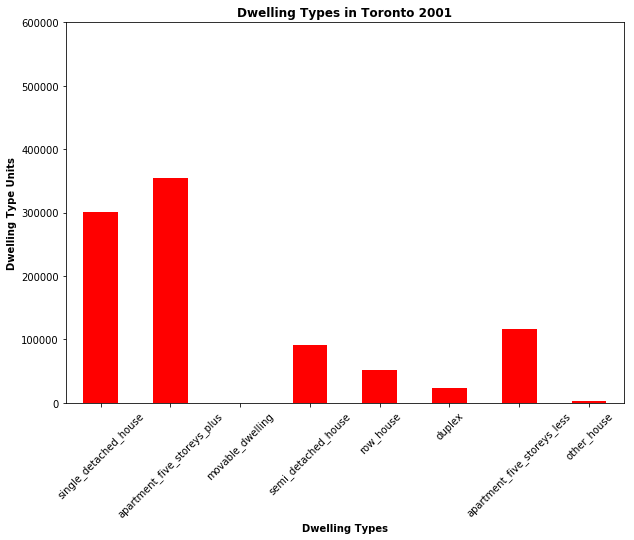

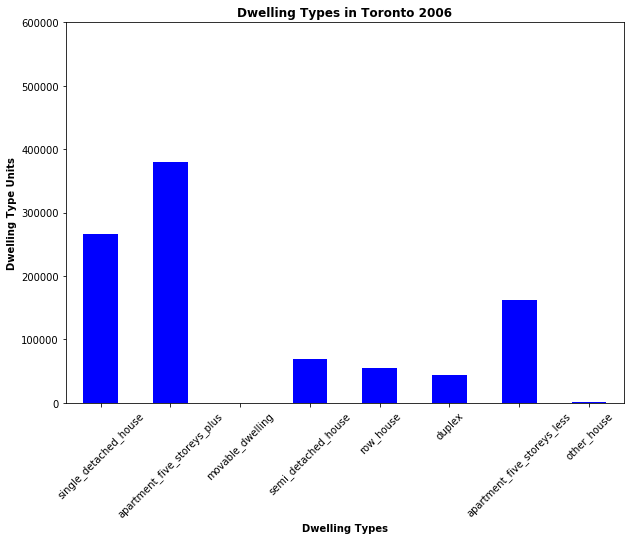

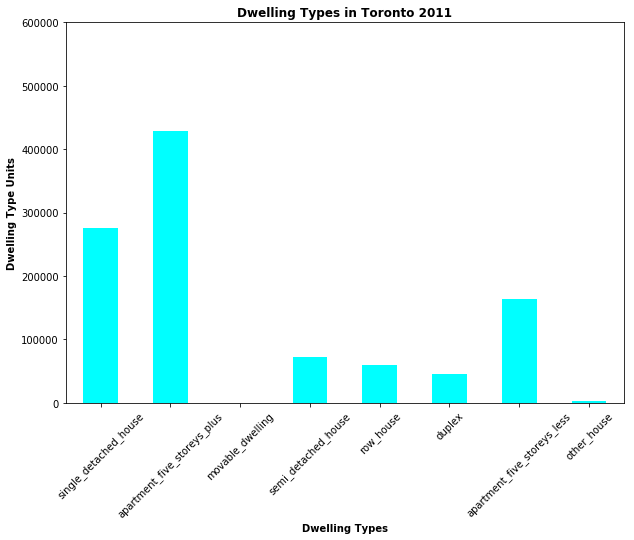

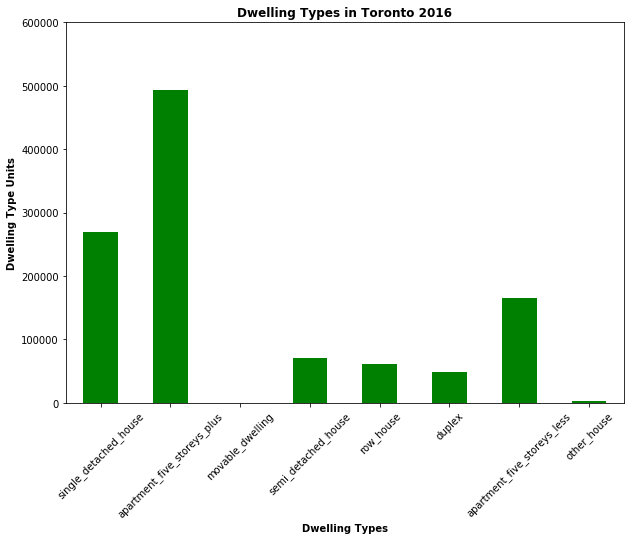

In [61]:
# Create a bar chart per year to show the number of dwelling types
years = [2001, 2006, 2011, 2016]
colors = ['red', 'blue', 'cyan', 'green']

for i in range(len(years)):
    fig = plt.subplots()
    # Data
    data = dwellings_grp_df.iloc[i, :]
    title = f"Dwelling Types in Toronto {years[i]}"
    xlabel = 'Dwelling Types'
    ylabel = 'Dwelling Type Units'
    color = f"{colors[i]}"  
    create_bar_chart(data, title, xlabel, ylabel, color)

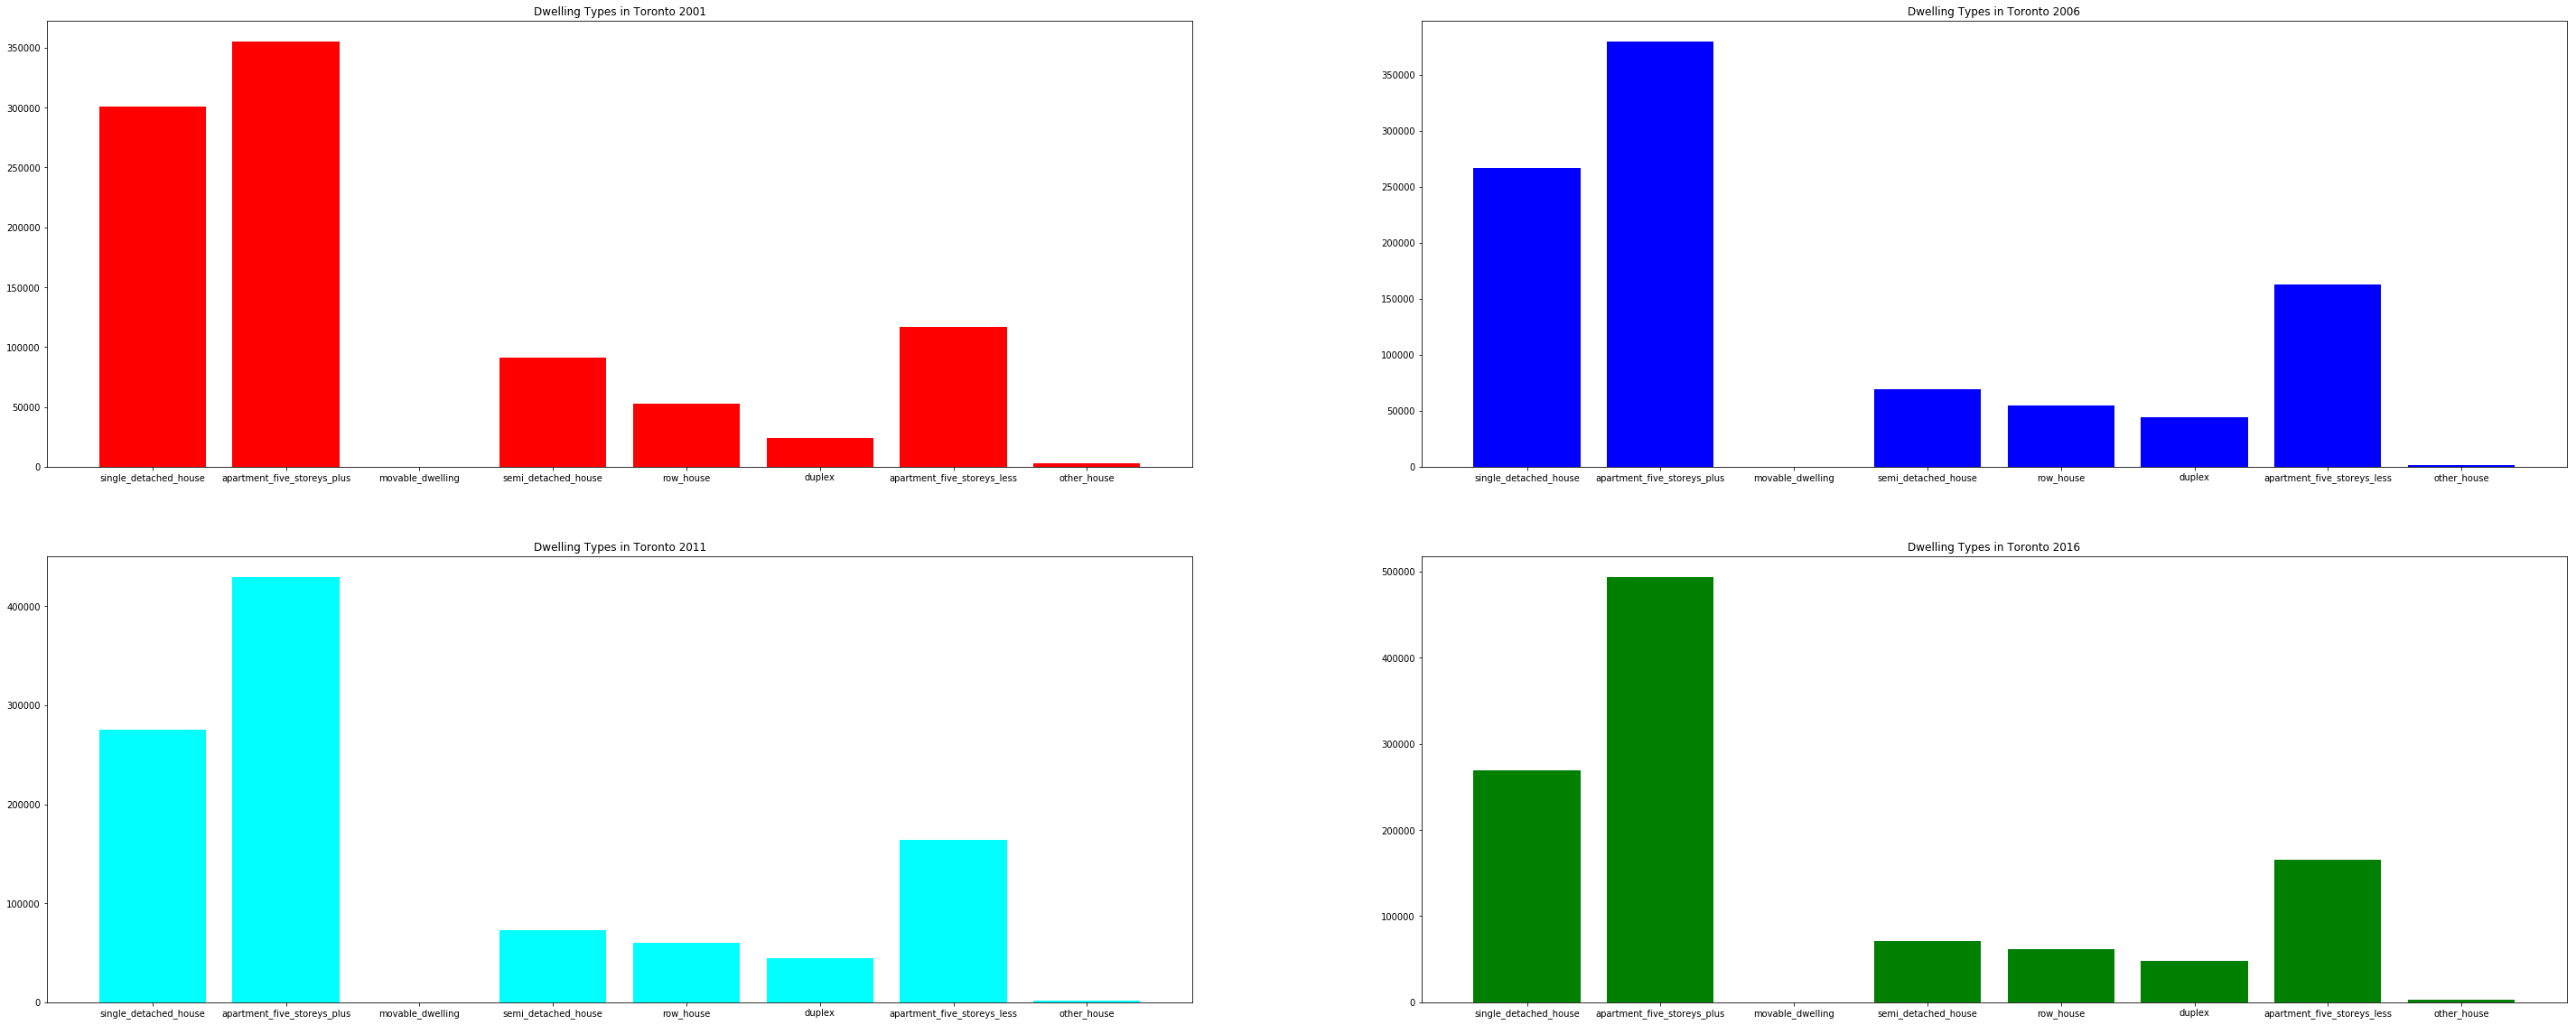

In [62]:
# Create a bar chart per year to show the number of dwelling types
years = [2001, 2006, 2011, 2016]
colors = ['red', 'blue', 'cyan', 'green']

fig = plt.figure(figsize=(50,20))
j=0

for i in range(len(years)):
    j = j +1
    
    # Data
    data = dwellings_grp_df.iloc[i, :]
    title = f"Dwelling Types in Toronto {years[i]}"
    xlabel = 'Dwelling Types'
    ylabel = 'Dwelling Type Units'
    color = f"{colors[i]}"  

    # Plot
    ax = fig.add_subplot(2,2,j)
    ax.bar(data.to_frame().T.columns,data.to_frame().T.iloc[0], color=color)
    ax.set_title(title)
    ax.set_xlabel=xlabel
    ax.set_ylabel=ylabel
    
plt.show()

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [63]:
#Main df
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [64]:
# Calculate the average monthly shelter costs for owned and rented dwellings
cost_owned_df = to_data[["shelter_costs_owned", "shelter_costs_rented"]]
cost_owned_grp_df = cost_owned_df.groupby(['year']).mean()
cost_owned_grp_df

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [65]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """    
    plot1 = data.plot.line(color=color, figsize=(10, 7))
    plot1.set_title(str(title), fontweight='bold')
    plot1.set_xlabel(str(xlabel), fontweight='bold')
    plot1.set_ylabel(str(ylabel), fontweight='bold')
    
    return plot1

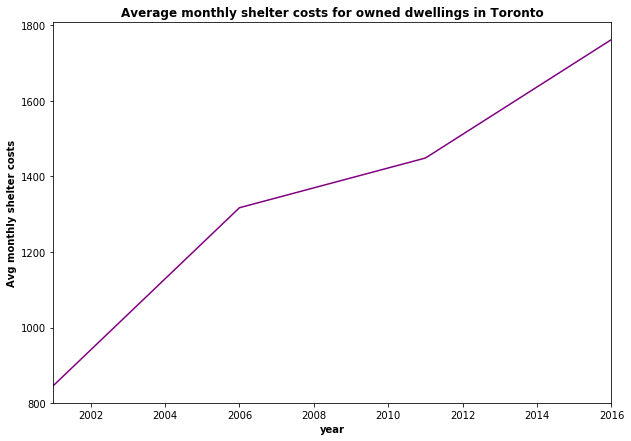

In [66]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
data_owned_dwellings = cost_owned_grp_df.iloc[:, 0]
title_owned_dwellings = 'Average monthly shelter costs for owned dwellings in Toronto'
xlabel_owned_dwellings = 'year'
ylabel_owned_dwellings = 'Avg monthly shelter costs'
color_owned_dwellings = 'purple'

create_line_chart(data_owned_dwellings, title_owned_dwellings, xlabel_owned_dwellings, ylabel_owned_dwellings, color_owned_dwellings)

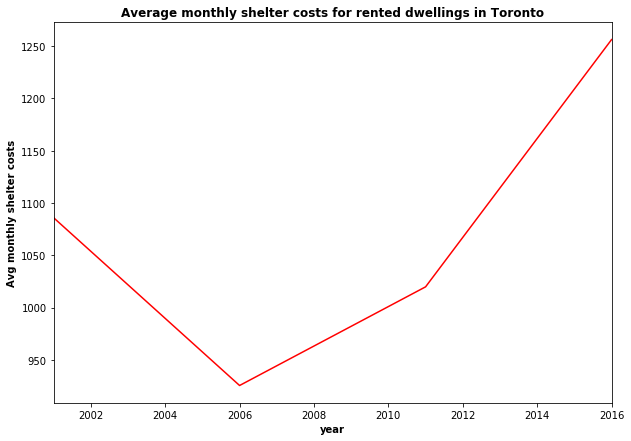

In [67]:
# Line chart for rented dwellings
data_rented_dwellings = cost_owned_grp_df.iloc[:, 1]
title_rented_dwellings = 'Average monthly shelter costs for rented dwellings in Toronto'
xlabel_rented_dwellings = 'year'
ylabel_rented_dwellings = 'Avg monthly shelter costs'
color_rented_dwellings = 'red'

create_line_chart(data_rented_dwellings, title_rented_dwellings, xlabel_rented_dwellings, ylabel_rented_dwellings, color_rented_dwellings)

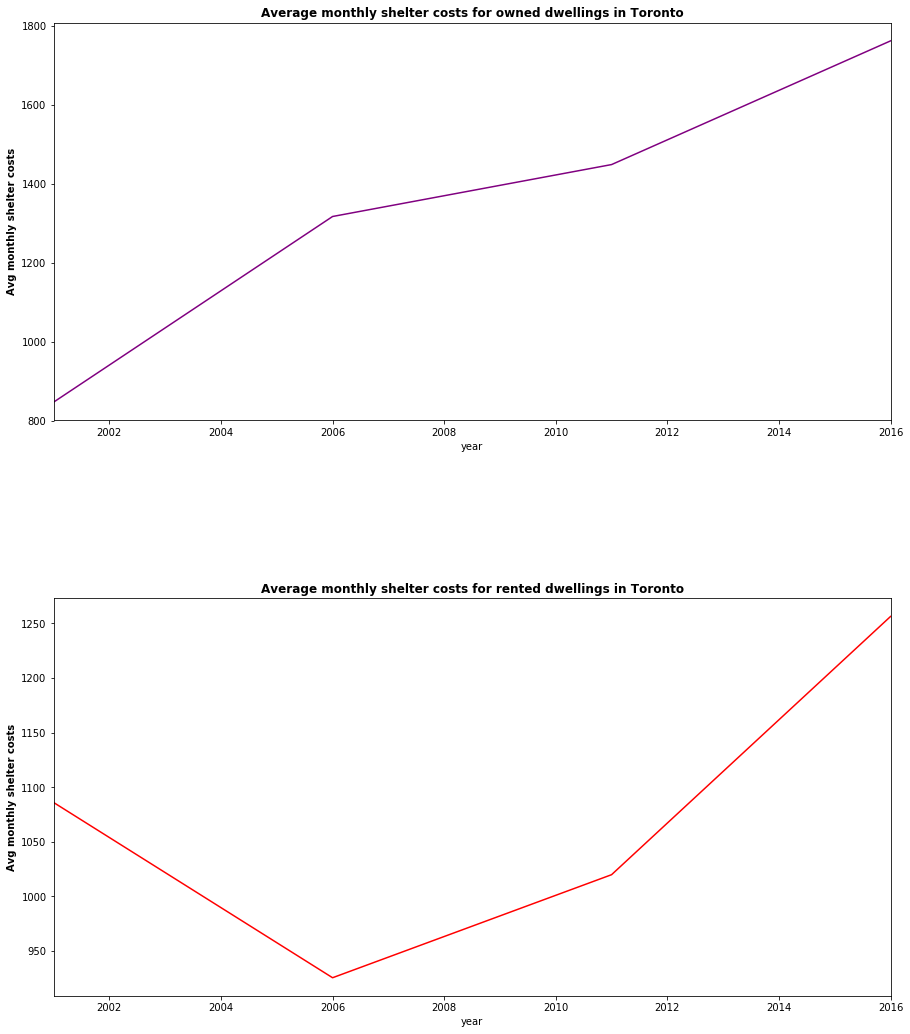

In [68]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year
from matplotlib.gridspec import GridSpec
fig3 = plt.figure(figsize=(15, 30))    
gs = GridSpec(20, 1, figure=fig3)
ax1 = plt.subplot(gs[0:5,0])
ax2 = plt.subplot(gs[7:12,0])

# Plot 
plot1 = cost_owned_grp_df.iloc[:, 0].plot.line(ax=ax1, color=['purple'])
plot1.set_title("Average monthly shelter costs for owned dwellings in Toronto", fontweight='bold')
plot1.set_ylabel("Avg monthly shelter costs", fontweight='bold')
#plot1.set_ylim([0, 1800])

plot2 = cost_owned_grp_df.iloc[:, 1].plot.line(ax=ax2, color=['red'])
plot2.set_title("Average monthly shelter costs for rented dwellings in Toronto", fontweight='bold')
plot2.set_ylabel("Avg monthly shelter costs", fontweight='bold')
#plot2.set_ylim([0, 1800])

fig3.savefig('GrossRent.png')

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [69]:
#Main df
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [70]:
# Calculate the average house value per year
avg_house_val_df = to_data[["average_house_value"]].groupby(to_data.index).mean()

avg_house_val_df.head()

,average_house_value
year,
2001,289882.885714
2006,424059.664286
2011,530424.721429
2016,664068.328571


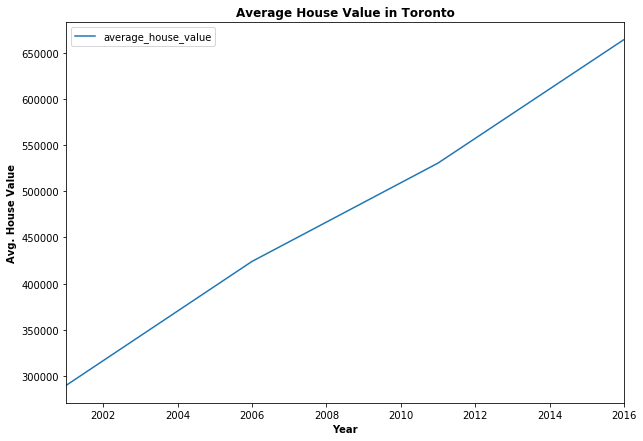

In [71]:
# Plot the average house value per year as a line chart
plot_avg_house_val = avg_house_val_df.plot.line(figsize=(10, 7))
plot_avg_house_val.set_title('Average House Value in Toronto', fontweight='bold')
plot_avg_house_val.set_ylabel('Avg. House Value', fontweight='bold')
plot_avg_house_val.set_xlabel('Year', fontweight='bold')
plot_avg_house_val.figure.savefig('AverageSales.png')

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [72]:
#Main df
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [73]:
mean_neigh_df = to_data[["neighbourhood", "average_house_value"]]
mean_neigh_df.head()

,neighbourhood,average_house_value
year,,
2001,Agincourt North,200388
2001,Agincourt South-Malvern West,203047
2001,Alderwood,259998
2001,Annex,453850
2001,Banbury-Don Mills,371864


In [74]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood. The plot should have a dropdown selector for the neighbourhood
mean_neigh_df.hvplot.line(xlabel='Year', 
                          groupby='neighbourhood',
                          height=500,
                          yformatter="%.0f")

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [75]:
# main_df
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [76]:
# Fetch the data of all dwelling types per year
dwellings_new = to_data.drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented"])
dwellings_new.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2001,Alderwood,3175,315,0,470,50,185,370,0
2001,Annex,1060,6090,5,1980,605,275,3710,165
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0


In [77]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood. The plot should have a dropdown selector for the neighbourhood.
dwellings_new.hvplot.bar(groupby="neighbourhood",
                         rot=90, 
                         height=600,
                         ylabel='Dwelling Type Units')

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [78]:
# main_df
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [79]:
# Getting the data from the top 10 expensive neighbourhoods
exp_house_df = to_data[["neighbourhood", "average_house_value"]].sort_values(by="average_house_value", ascending=False).drop_duplicates("neighbourhood")
exp_house_df.head(10)

,neighbourhood,average_house_value
year,,
2016,Bridle Path-Sunnybrook-York Mills,2124653
2016,Forest Hill South,1664653
2016,Lawrence Park South,1522732
2016,Rosedale-Moore Park,1522193
2016,St.Andrew-Windfields,1390616
2016,Casa Loma,1365503
2016,Bedford Park-Nortown,1295007
2016,Forest Hill North,1185419
2016,Kingsway South,1173663


In [80]:
# Top 10 neighbourhoods after dropping duplicates
exp_house_top10_df = exp_house_df.iloc[0:10, :]
exp_house_top10_df.reset_index(inplace=True)
exp_house_top10_df

,year,neighbourhood,average_house_value
0,2016,Bridle Path-Sunnybrook-York Mills,2124653
1,2016,Forest Hill South,1664653
2,2016,Lawrence Park South,1522732
3,2016,Rosedale-Moore Park,1522193
4,2016,St.Andrew-Windfields,1390616
5,2016,Casa Loma,1365503
6,2016,Bedford Park-Nortown,1295007
7,2016,Forest Hill North,1185419
8,2016,Kingsway South,1173663
9,2016,Yonge-St.Clair,1131888


In [81]:
# Plotting the data from the top 10 expensive neighbourhoods
exp_house_top10_df.hvplot.bar(x='neighbourhood', y='average_house_value', rot=0).opts(height=500, 
                                                                                      title="Top 10 Expensive Neighbourhoods in Toronto",
                                                                                      invert_axes=True,
                                                                                      xformatter="%.0f") 

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [82]:
# Load neighbourhoods coordinates data
file_path = (r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Homework\Week 6\Instructions\Starter_Code\Data\toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.shape

(140, 3)

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [83]:
to_data.tail()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2016,Wychwood,920,1295,0,880,290,395,2080,35,787760,1864,1146
2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0,1127052,2398,1535
2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0,1131888,2192,1619
2016,York University Heights,1235,5505,0,1360,775,280,995,0,425769,1444,1122
2016,Yorkdale-Glen Park,2165,1185,0,80,600,465,830,5,599698,1451,1128


In [84]:
# Calculate the mean values for each neighborhood
mean_val = to_data[["neighbourhood", "average_house_value"]].drop_duplicates("neighbourhood").reset_index()
mean_val.tail()

,year,neighbourhood,average_house_value
135,2001,Wychwood,343877
136,2001,Yonge-Eglinton,491987
137,2001,Yonge-St.Clair,494098
138,2001,York University Heights,185859
139,2001,Yorkdale-Glen Park,261784


In [85]:
# Join the average values with the neighbourhood locations
concat_df = pd.merge(df_neighbourhood_locations, mean_val, on='neighbourhood', how='inner')
concat_df.tail()

,neighbourhood,lat,lon,year,average_house_value
135,Wychwood,43.676919,-79.425515,2001,343877
136,Yonge-Eglinton,43.704689,-79.403590,2001,491987
137,Yonge-St.Clair,43.687859,-79.397871,2001,494098
138,York University Heights,43.765736,-79.488883,2001,185859
139,Yorkdale-Glen Park,43.714672,-79.457108,2001,261784


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [86]:
# Mapbox api key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")

# Set MAPBOX api
px.set_mapbox_access_token(map_box_api)

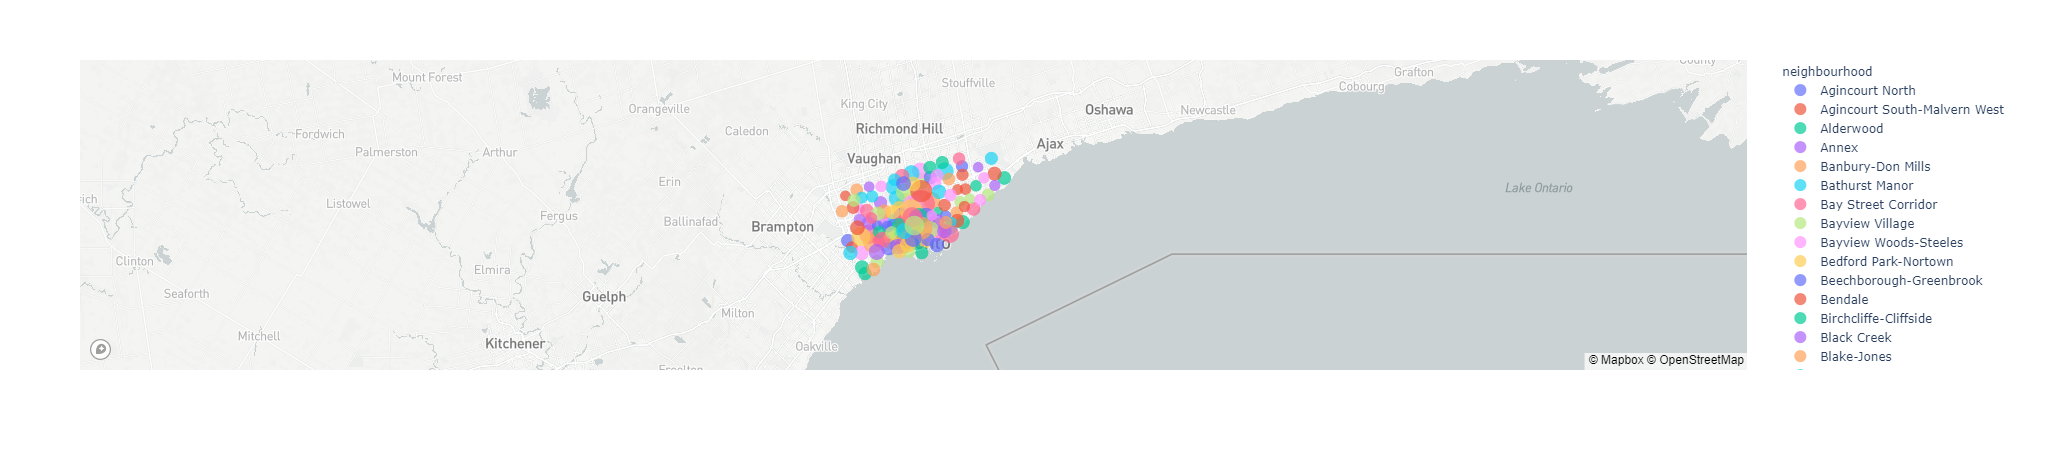

In [87]:
# Create a scatter mapbox to analyze neighbourhood info
scatter_map = px.scatter_mapbox(concat_df,
                                lat='lat',
                                lon='lon',
                                color='neighbourhood',
                                size='average_house_value')
scatter_map

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [88]:
#main df
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [89]:
facet_df = to_data[["neighbourhood", "average_house_value"]].reset_index()
facet_df.head()

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864


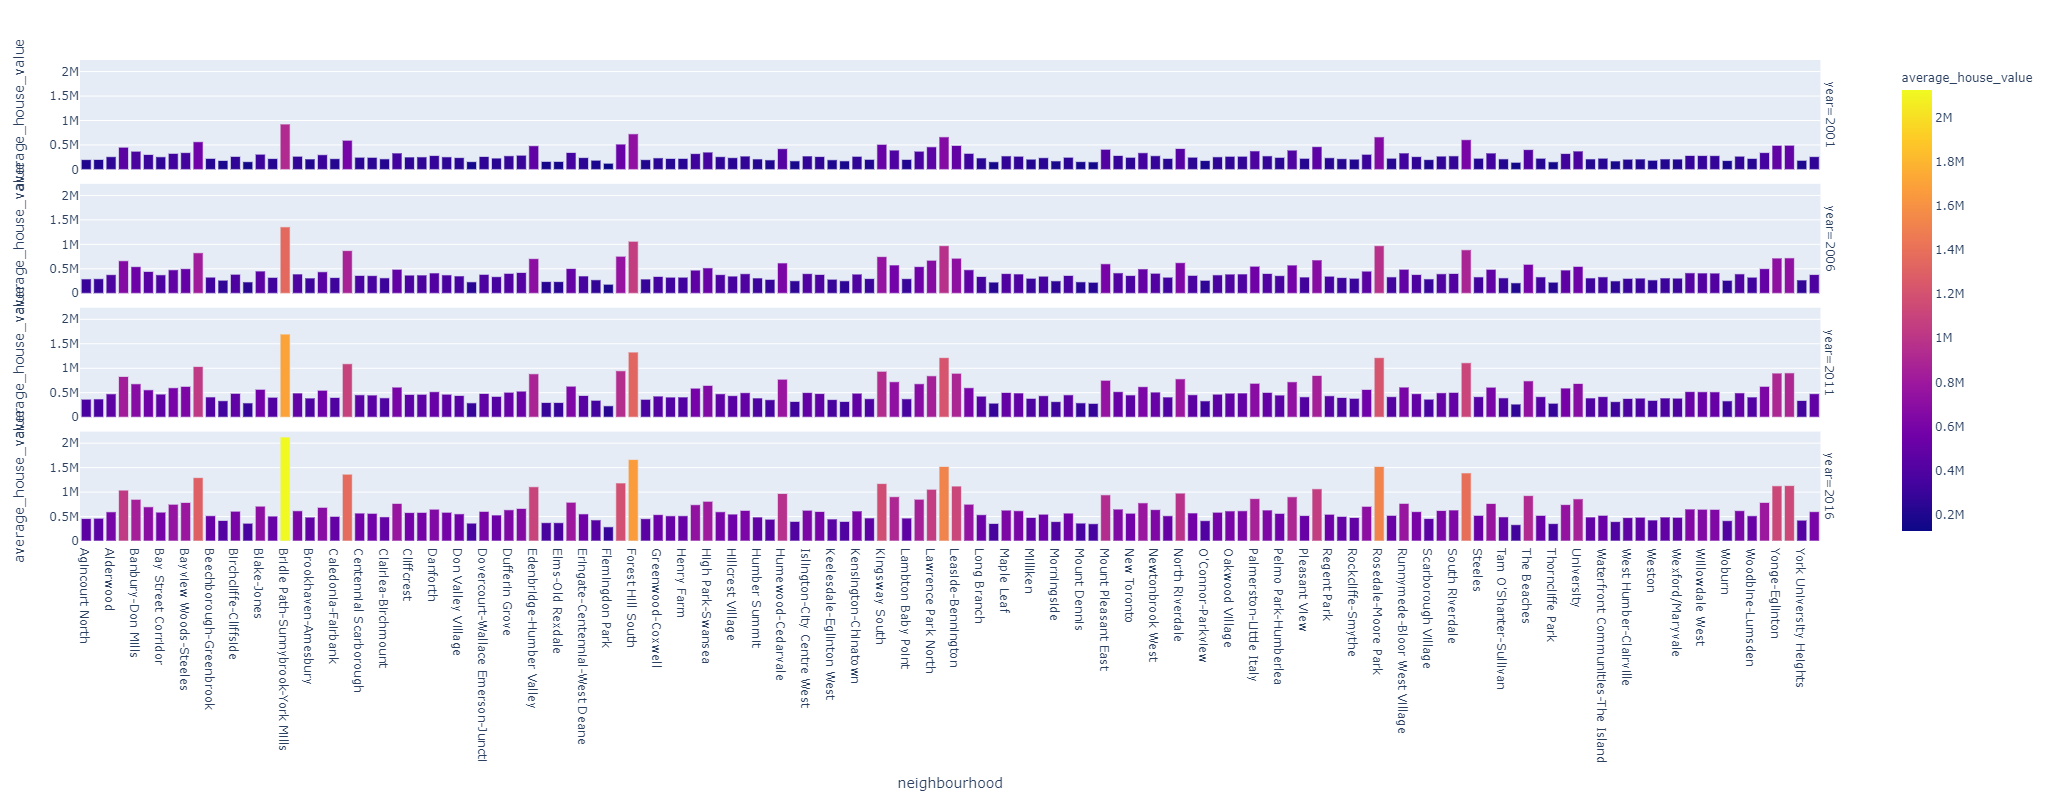

In [90]:
fig_bar = px.bar(facet_df,
                 x='neighbourhood',
                 y='average_house_value',
                 facet_row='year',
                 color='average_house_value',
                 height=800)
                                
fig_bar.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [91]:
#main df
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [92]:
# Fetch the data from all expensive neighbourhoods per year.
exp_neighbourhoods_df = to_data[["neighbourhood", "average_house_value"]].reset_index()
exp_neighbourhoods_df.head()

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864


In [93]:
df_2001 = exp_neighbourhoods_df.loc[exp_neighbourhoods_df['year'] == 2001].sort_values('average_house_value', ascending=False)
df_2001_top10 = df_2001.iloc[0:10, :]
df_2001_top10.head(10)

,year,neighbourhood,average_house_value
16,2001,Bridle Path-Sunnybrook-York Mills,927466
44,2001,Forest Hill South,726664
69,2001,Lawrence Park South,664712
104,2001,Rosedale-Moore Park,664476
111,2001,St.Andrew-Windfields,607040
21,2001,Casa Loma,596077
9,2001,Bedford Park-Nortown,565304
43,2001,Forest Hill North,517466
64,2001,Kingsway South,512334
137,2001,Yonge-St.Clair,494098


In [94]:
df_2006 = exp_neighbourhoods_df.loc[exp_neighbourhoods_df['year'] == 2006].sort_values('average_house_value', ascending=False)
df_2006_top10 = df_2006.iloc[0:10, :]
df_2006_top10.head(10)

,year,neighbourhood,average_house_value
156,2006,Bridle Path-Sunnybrook-York Mills,1356757
184,2006,Forest Hill South,1063011
209,2006,Lawrence Park South,972384
244,2006,Rosedale-Moore Park,972039
251,2006,St.Andrew-Windfields,888017
161,2006,Casa Loma,871981
149,2006,Bedford Park-Nortown,826963
183,2006,Forest Hill North,756983
204,2006,Kingsway South,749476
277,2006,Yonge-St.Clair,722799


In [95]:
df_2011 = exp_neighbourhoods_df.loc[exp_neighbourhoods_df['year'] == 2011].sort_values('average_house_value', ascending=False)
df_2011_top10 = df_2011.iloc[0:10, :]
df_2011_top10.head(10)

,year,neighbourhood,average_house_value
296,2011,Bridle Path-Sunnybrook-York Mills,1697067
324,2011,Forest Hill South,1329642
349,2011,Lawrence Park South,1216283
384,2011,Rosedale-Moore Park,1215852
391,2011,St.Andrew-Windfields,1110755
301,2011,Casa Loma,1090696
289,2011,Bedford Park-Nortown,1034387
323,2011,Forest Hill North,946854
344,2011,Kingsway South,937464
417,2011,Yonge-St.Clair,904096


In [96]:
df_2016 = exp_neighbourhoods_df.loc[exp_neighbourhoods_df['year'] == 2016].sort_values('average_house_value', ascending=False)
df_2016_top10 = df_2016.iloc[0:10, :]
df_2016_top10.head(10)

,year,neighbourhood,average_house_value
436,2016,Bridle Path-Sunnybrook-York Mills,2124653
464,2016,Forest Hill South,1664653
489,2016,Lawrence Park South,1522732
524,2016,Rosedale-Moore Park,1522193
531,2016,St.Andrew-Windfields,1390616
441,2016,Casa Loma,1365503
429,2016,Bedford Park-Nortown,1295007
463,2016,Forest Hill North,1185419
484,2016,Kingsway South,1173663
557,2016,Yonge-St.Clair,1131888


In [102]:
df_years_merged = pd.concat((df_2001_top10, df_2006_top10, df_2011_top10, df_2016_top10), axis=0, join='inner')
df_years_merged.head()

,year,neighbourhood,average_house_value
16,2001,Bridle Path-Sunnybrook-York Mills,927466
44,2001,Forest Hill South,726664
69,2001,Lawrence Park South,664712
104,2001,Rosedale-Moore Park,664476
111,2001,St.Andrew-Windfields,607040


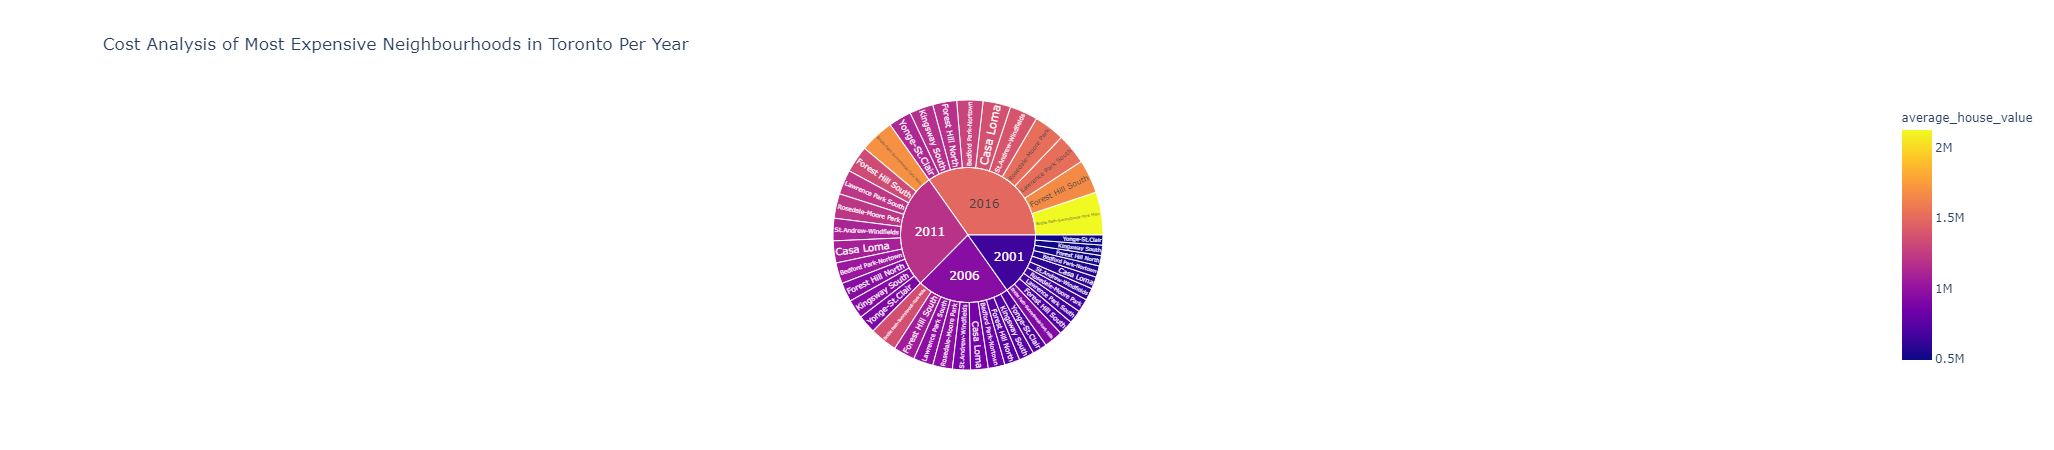

In [98]:
fig_sunburst = px.sunburst(df_years_merged, 
                           path=['year', 'neighbourhood'], 
                           values='average_house_value',
                           color='average_house_value',
                           names='neighbourhood',
                           title='Cost Analysis of Most Expensive Neighbourhoods in Toronto Per Year',
                           maxdepth=2)

fig_sunburst.show()